In [96]:
# 使用网格搜索法对5个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [97]:
#使用了网格搜索+交叉验证建立模型
params_lr = {'solver': ['newton-cg', 'lbfgs', 'sag'], 'C': [0.1, 1, 10]}
lr_model = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), params_lr, cv=5, scoring='roc_auc')

params_svm = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10]}
svm_model = GridSearchCV(SVC(class_weight='balanced', gamma='auto', probability=True), params_svm, cv=5, scoring='roc_auc')

params_dt = {'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]}
dt_model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), params_dt, cv=5, scoring='roc_auc')

params_rf = {'n_estimators': range(10, 80, 10), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]}
rf_model = GridSearchCV(RandomForestClassifier(class_weight='balanced'), params_rf, cv=5, scoring='roc_auc')

params_en = {'n_estimators': range(10, 80, 10)}
xg_model = GridSearchCV(XGBClassifier(), params_en, cv=5, scoring='roc_auc')

models = {'LR': lr_model,
          'SVM': svm_model,
          'DT': dt_model,
          'RF': rf_model,
          'XGBoost': xg_model}

In [98]:
# 模型评估：计算指标的函数和画图的函数

def get_metric(clf, x, y_true):
    y_pred = clf.predict(x)
    y_proba = clf.predict_proba(x)

    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_proba[:, 1])
    auc = metrics.auc(fpr, tpr)
    return acc, p, r, f1, fpr, tpr, auc


def plot_roc(fprs, tprs, aucs, title):
    plt.figure()
    lw = 2
    for i, name in enumerate(models):
        plt.plot(fprs[i], tprs[i], lw=lw,
                 label='{0} (AUC:{1:0.2f})'.format(name, aucs[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of '+title)
    plt.legend(loc="lower right")
    plt.savefig(title + '.jpg')
    plt.show()

/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag

LR
{'C': 1, 'solver': 'newton-cg'}


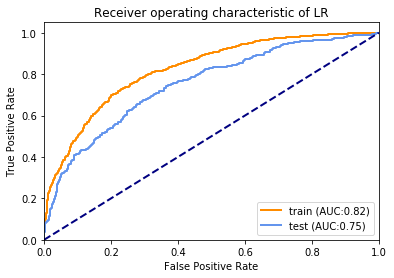

SVM
{'C': 0.1, 'kernel': 'linear'}


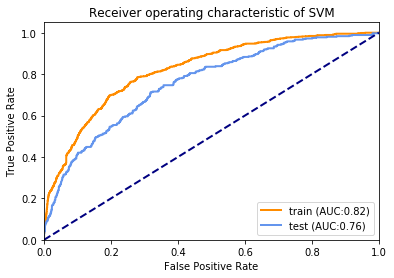

DT
{'criterion': 'entropy', 'max_features': None}


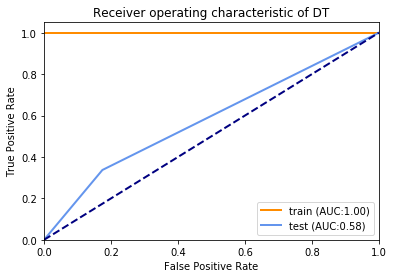

RF
{'criterion': 'entropy', 'max_features': None, 'n_estimators': 60}


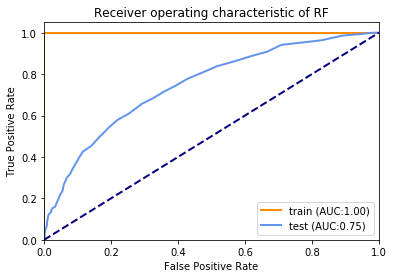

XGBoost
{'n_estimators': 50}


/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/wangzhengzheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


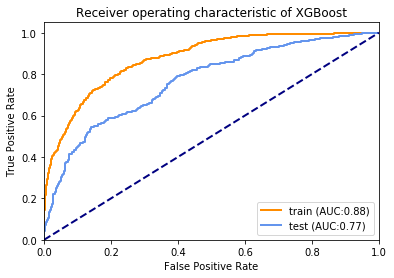

     Model dataset  Accuracy  Precision    Recall  F1 score       AUC
0       LR   train  0.764352   0.522007  0.711031  0.602030  0.823418
1       LR    test  0.704975   0.441729  0.654596  0.527497  0.751753
2      SVM   train  0.763451   0.520524  0.714628  0.602324  0.820950
3      SVM    test  0.701472   0.435946  0.635097  0.517007  0.756419
4       DT   train  1.000000   1.000000  1.000000  1.000000  1.000000
5       DT    test  0.702873   0.394137  0.337047  0.363363  0.581445
6       RF   train  1.000000   1.000000  1.000000  1.000000  1.000000
7       RF    test  0.767344   0.601504  0.222841  0.325203  0.747550
8  XGBoost   train  0.831380   0.822695  0.417266  0.553699  0.877498
9  XGBoost    test  0.786966   0.648649  0.334262  0.441176  0.765714


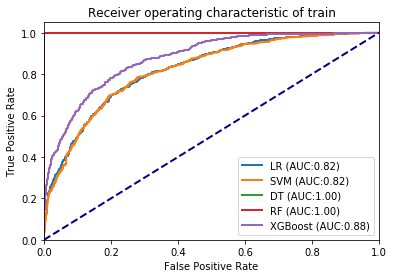

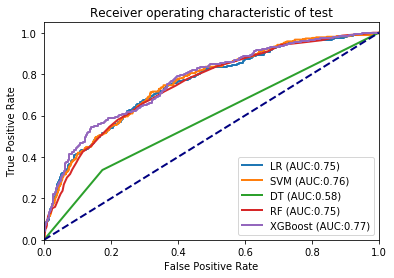

In [99]:
# 进行训练、模型评估和画图

df_result = pd.DataFrame(columns=('Model', 'dataset', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC'))
row = 0
fprs_train = []
tprs_train = []
aucs_train = []
fprs_test = []
tprs_test = []
aucs_test = []
for name, clf in models.items():
    clf.fit(x_train, y_train)
    print(name)
    print(clf.best_params_)
    acc, p, r, f1, fpr_train, tpr_train, auc_train = get_metric(clf, x_train, y_train)
    fprs_train.append(fpr_train)
    tprs_train.append(tpr_train)
    aucs_train.append(auc_train)
    df_result.loc[row] = [name, 'train', acc, p, r, f1, auc_train]
    row += 1

    acc, p, r, f1, fpr_test, tpr_test, auc_test = get_metric(clf, x_test, y_test)
    fprs_test.append(fpr_test)
    tprs_test.append(tpr_test)
    aucs_test.append(auc_test)
    df_result.loc[row] = [name, 'test', acc, p, r, f1, auc_test]
    row += 1

    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=lw, label='train (AUC:%0.2f)' % auc_train)
    plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=lw, label='test (AUC:%0.2f)' % auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of '+name)
    plt.legend(loc="lower right")
    plt.savefig(name + '.jpg')
    plt.show()


print(df_result)
df_result.to_csv("df_result.csv")

plot_roc(fprs_train, tprs_train, aucs_train, 'train')
plot_roc(fprs_test, tprs_test, aucs_test, 'test')